[[4.86 4.87 0.  ]
 [4.69 5.37 0.  ]
 [3.82 5.71 0.  ]
 ...
 [5.58 7.17 1.  ]
 [8.62 6.02 1.  ]
 [3.05 2.11 1.  ]]


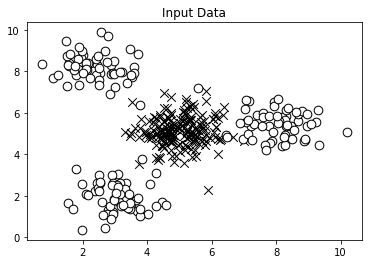

In [1]:
#Use a decision tree to classify given data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline
%run visualize_classifier.ipynb

input_file = 'data_decision_trees.txt'
data = np.loadtxt(input_file, delimiter = ',')
print(data)
X, y = data[:, :-1], data[:, -1]

class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])

plt.figure()
plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='black', edgecolors='black', linewidth = 1, marker = 'x')
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='white', edgecolors='black', linewidth = 1, marker = 'o')
plt.title("Input Data")
plt.show()

#When plotting the data, we see that it may be difficult to classify using lines...

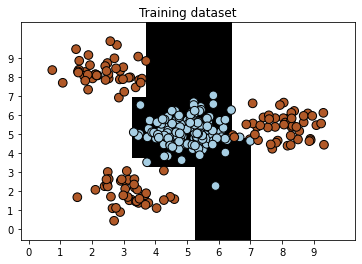

In [2]:
#Split data into 75% training and 25% testing data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.25, random_state = 5)

#Classifier
params = {'random_state':0, 'max_depth': 4}
classifier  = DecisionTreeClassifier(**params)
classifier.fit(X_train, y_train)
visualize_classifier(classifier, X_train, y_train, 'Training dataset')

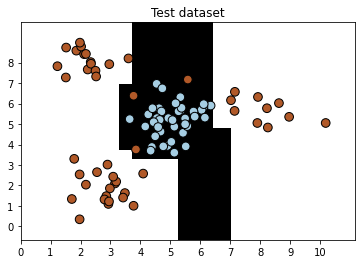

In [3]:
#Visualize testing data
y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, y_test, 'Test dataset')

In [4]:
#Accuracy report
class_names = ['Class-0', 'Class-1']
print("Classifier Performance on training dataset\n")
print(classification_report(y_train, classifier.predict(X_train), target_names = class_names))

print("Classifier Performance on Test Dataset\n")
print(classification_report(y_test, y_test_pred, target_names = class_names))


Classifier Performance on training dataset

              precision    recall  f1-score   support

     Class-0       0.99      1.00      1.00       137
     Class-1       1.00      0.99      1.00       133

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270

Classifier Performance on Test Dataset

              precision    recall  f1-score   support

     Class-0       0.93      1.00      0.97        43
     Class-1       1.00      0.94      0.97        47

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90

